In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import scipy

data = pd.read_csv('/content/gapminder.csv', low_memory=False)

data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')

In [47]:
data_clean = data.dropna()
# Perform ANOVA, Chi-Square Test or correlation coefficient that includes a moderator
scipy.stats.pearsonr(data_clean['employrate'], data_clean['internetuserate'])

(-0.2008440212232401, 0.009916806354755265)

In [48]:
def incomegrp (row):
    if row['incomeperperson'] <= 744.239:
        return 1
    elif row['incomeperperson'] <= 9425.326:
        return 2
    elif row['incomeperperson'] > 9425.326:
        return 3

pd.options.mode.chained_assignment = None 
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)
 
chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
chk1

1    45
2    79
3    40
Name: incomegrp, dtype: int64

In [49]:
clean_sub1 = data_clean[(data_clean['incomegrp']== 1)]
clean_sub2 = data_clean[(data_clean['incomegrp']== 2)]
clean_sub3 = data_clean[(data_clean['incomegrp']== 3)]

In [50]:
scipy.stats.pearsonr(clean_sub1['employrate'], clean_sub1['internetuserate'])

(-0.27422129570810116, 0.06832051288158532)

In [51]:
scipy.stats.pearsonr(clean_sub2['employrate'], clean_sub2['internetuserate'])

(-0.21047736108033566, 0.06262271130127134)

In [52]:
scipy.stats.pearsonr(clean_sub3['employrate'], clean_sub3['internetuserate'])

(0.35072774773356874, 0.02649546231644128)

AttributeError: ignored

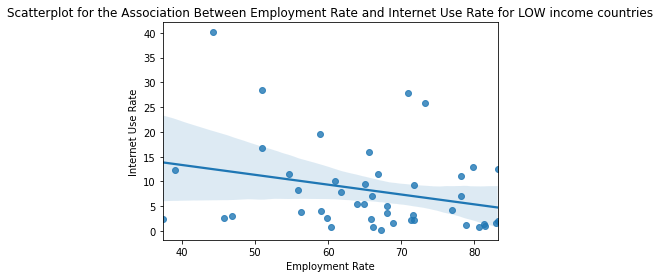

In [53]:
scat1 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub1)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for LOW income countries')
sns.plt.show()

AttributeError: ignored

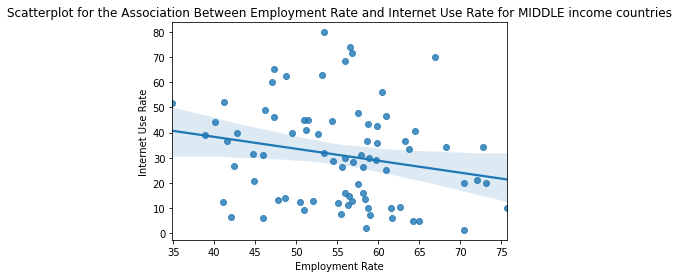

In [54]:
scat2 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub2)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for MIDDLE income countries')
sns.plt.show()


AttributeError: ignored

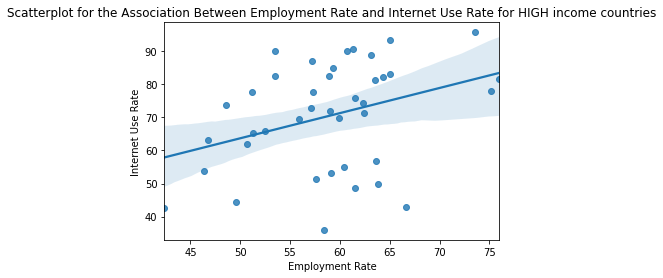

In [55]:
scat3 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub3)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for HIGH income countries')
sns.plt.show()